<a href="https://colab.research.google.com/github/newmantic/Markowitz/blob/main/Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

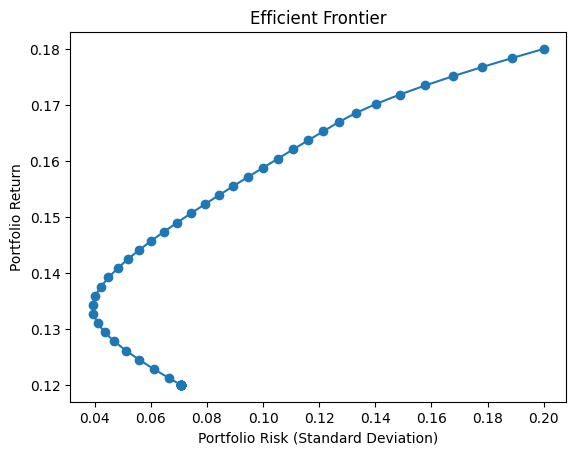

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def portfolio_return(weights, expected_returns):
    """
    Calculate the expected return of the portfolio.

    :param weights: Array of portfolio weights
    :param expected_returns: Array of expected returns for each asset
    :return: Expected portfolio return
    """
    return np.dot(weights, expected_returns)

def portfolio_variance(weights, cov_matrix):
    """
    Calculate the variance of the portfolio.

    :param weights: Array of portfolio weights
    :param cov_matrix: Covariance matrix of asset returns
    :return: Portfolio variance
    """
    return np.dot(weights.T, np.dot(cov_matrix, weights))

def optimize_portfolio(expected_returns, cov_matrix, target_return=None):
    """
    Optimize the portfolio weights to minimize variance for a given target return.

    :param expected_returns: Array of expected returns for each asset
    :param cov_matrix: Covariance matrix of asset returns
    :param target_return: Desired portfolio return (optional)
    :return: Optimized portfolio weights
    """
    num_assets = len(expected_returns)
    args = (expected_returns, cov_matrix)

    # Constraints: weights sum to 1 and return equals target_return (if specified)
    constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
    if target_return is not None:
        constraints.append({'type': 'eq', 'fun': lambda weights: portfolio_return(weights, expected_returns) - target_return})

    bounds = tuple((0, 1) for _ in range(num_assets))
    result = minimize(lambda weights: portfolio_variance(weights, cov_matrix), num_assets * [1. / num_assets],
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result.x

# Example

# Assume we have historical return data for 3 assets
expected_returns = np.array([0.12, 0.18, 0.15])  # Expected returns for 3 assets
cov_matrix = np.array([[0.005, -0.010, 0.004],
                       [-0.010, 0.040, -0.002],
                       [0.004, -0.002, 0.023]])  # Covariance matrix of the assets

# Generate portfolios along the efficient frontier
target_returns = np.linspace(0.10, 0.18, 50)
efficient_portfolios = [optimize_portfolio(expected_returns, cov_matrix, r) for r in target_returns]

# Calculate statistics for the efficient portfolios
efficient_returns = [portfolio_return(p, expected_returns) for p in efficient_portfolios]
efficient_variances = [portfolio_variance(p, cov_matrix) for p in efficient_portfolios]

# Plot the efficient frontier
plt.plot(np.sqrt(efficient_variances), efficient_returns, marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.show()